In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve


In [26]:
# Reading the data set
data = pd.read_csv('Credit.csv')
# Printing frist 10 rows
data.head(10)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,7,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [27]:
data.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [28]:
# Creating dummy variables for categorical data
data = pd.get_dummies(data, columns=['Married','Gender', 'Student', 'Ethnicity'], drop_first=True)

In [29]:
data.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Balance', 'Married_Yes', 'Gender_Male', 'Student_Yes',
       'Ethnicity_Asian', 'Ethnicity_Caucasian'],
      dtype='object')

In [30]:
data.head(10)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance,Married_Yes,Gender_Male,Student_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,333,True,True,False,False,True
1,2,106.025,6645,483,3,82,15,903,True,False,True,True,False
2,3,104.593,7075,514,4,71,11,580,False,True,False,True,False
3,4,148.924,9504,681,3,36,11,964,False,False,False,True,False
4,5,55.882,4897,357,2,68,16,331,True,True,False,False,True
5,6,80.180,8047,569,4,77,10,1151,False,True,False,False,True
6,7,20.996,3388,259,2,37,12,203,False,False,False,False,False
7,8,71.408,7114,512,2,87,9,872,False,True,False,True,False
8,9,15.125,3300,266,5,66,13,279,False,False,False,False,True
9,10,71.061,6819,491,3,41,19,1350,True,False,True,False,False


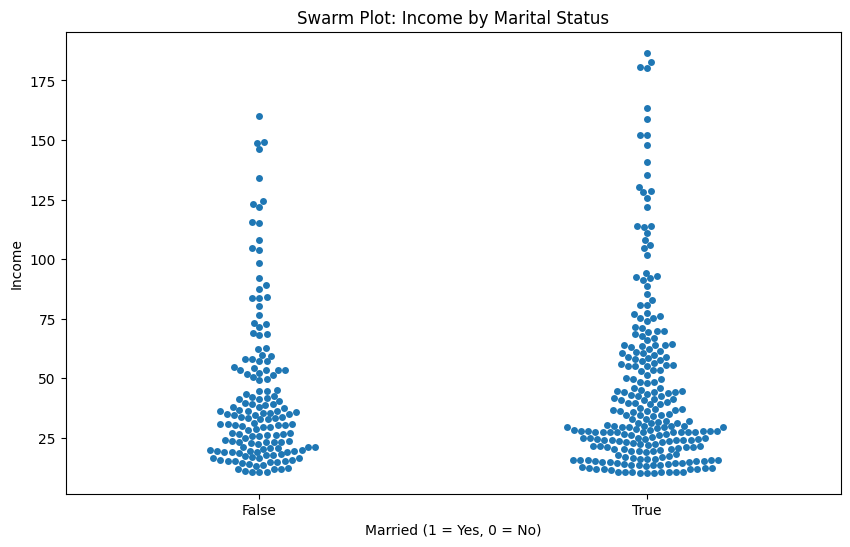

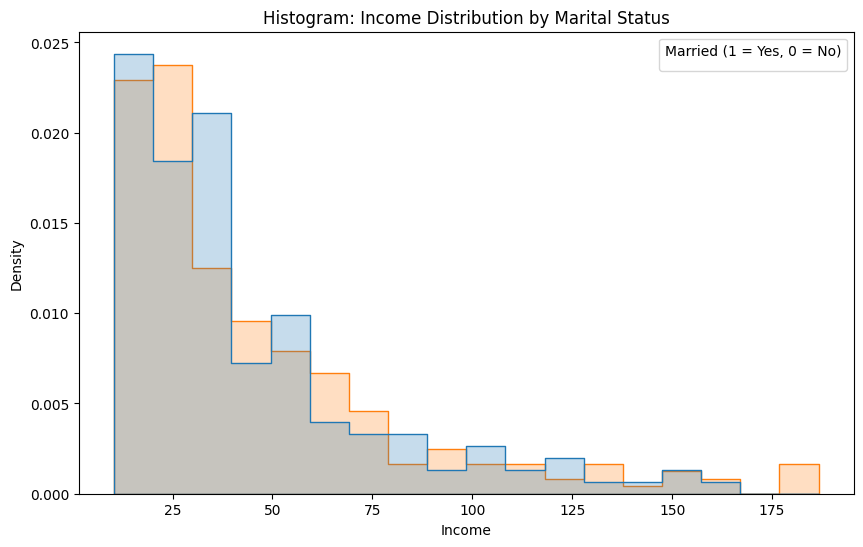

<Figure size 1000x600 with 0 Axes>

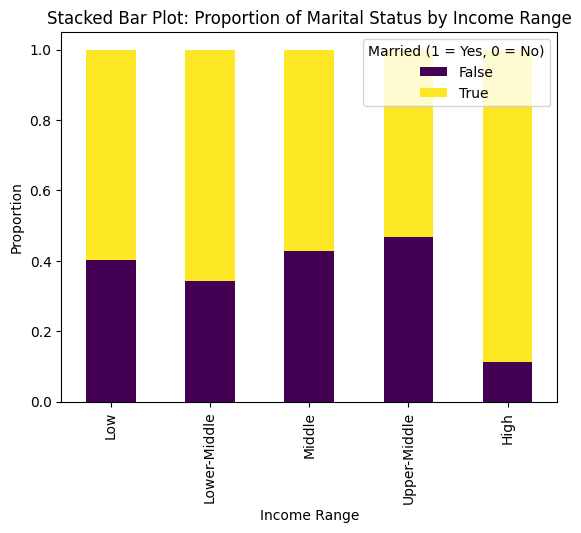

In [42]:
# Plotting Income over Marriage status to see if there is a relationship between them.
# Swarm Plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Married_Yes', y='Income', data=data)
plt.title('Swarm Plot: Income by Marital Status')
plt.xlabel('Married (1 = Yes, 0 = No)')
plt.ylabel('Income')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Income', hue='Married_Yes', element='step', kde=False, stat="density", common_norm=False)
plt.title('Histogram: Income Distribution by Marital Status')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend(title='Married (1 = Yes, 0 = No)')
plt.show()


# Stacked Bar Plot
data['Income_Bins'] = pd.cut(data['Income'], bins=5, labels=['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High'])
plt.figure(figsize=(10, 6))
income_married_crosstab = pd.crosstab(data['Income_Bins'], data['Married_Yes'], normalize='index')
income_married_crosstab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Stacked Bar Plot: Proportion of Marital Status by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Proportion')
plt.legend(title='Married (1 = Yes, 0 = No)')
plt.show()


In [34]:
# Defining X as all variables except for the category "Married"
# Trying to predict whether the individual is married
X = data.drop(['Married_Yes'], axis=1)
y = data['Married_Yes']



In [35]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (320, 12)
Testing set shape: (80, 12)


In [36]:

# Initializing the logistic regression model
logistic_model = LogisticRegression()

# Fitting the model on the training data
logistic_model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
# Making predictions on the test set
y_test_pred = logistic_model.predict(X_test)

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix

# Printing confusion matrix
print(confusion_matrix(y_test, y_test_pred))

# Printing classification report
print(classification_report(y_test, y_test_pred))


[[ 5 23]
 [ 5 47]]
              precision    recall  f1-score   support

       False       0.50      0.18      0.26        28
        True       0.67      0.90      0.77        52

    accuracy                           0.65        80
   macro avg       0.59      0.54      0.52        80
weighted avg       0.61      0.65      0.59        80

